##数据清理

In [ ]:
# Kütühaneleri yükleme
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
#
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot 
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
#
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
#
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC
#
from sklearn.linear_model import Lasso 
from sklearn.linear_model import ElasticNet 
from sklearn.model_selection import GridSearchCV 
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.svm import SVR 
#
from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.ensemble import ExtraTreesRegressor 
from sklearn.ensemble import AdaBoostRegressor 
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline 
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC 
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import ExtraTreesClassifier
import warnings
warnings.filterwarnings("ignore")


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

Saving avocado.csv to avocado (4).csv
User uploaded file "avocado.csv" with length 1989197 bytes


In [ ]:
data=pd.read_csv("avocado.csv")
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [ ]:
#Region
data.region.unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [ ]:
print(data["region"].value_counts(dropna=False))

RichmondNorfolk        338
Pittsburgh             338
NewOrleansMobile       338
Syracuse               338
TotalUS                338
Sacramento             338
GrandRapids            338
LasVegas               338
Louisville             338
Atlanta                338
DallasFtWorth          338
Nashville              338
Houston                338
Orlando                338
PhoenixTucson          338
BaltimoreWashington    338
Albany                 338
SanDiego               338
HarrisburgScranton     338
Charlotte              338
Boise                  338
Columbus               338
GreatLakes             338
Jacksonville           338
Midsouth               338
Northeast              338
Portland               338
Denver                 338
Spokane                338
West                   338
Roanoke                338
NorthernNewEngland     338
MiamiFtLauderdale      338
LosAngeles             338
Chicago                338
Indianapolis           338
Detroit                338
T

In [ ]:
#Year 时间跨度————四年 201年的数据偏少，其余三年都是5000多
data.year.unique()

array([2015, 2016, 2017, 2018])

In [ ]:
print(data["year"].value_counts(dropna=False))

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64


In [ ]:
###########Total Volume 
data["Total Volume"].mean()

850644.0130089332

In [ ]:
print(data["Total Volume"].value_counts(dropna=False))

3713.49      2
3529.44      2
2038.99      2
569349.05    2
4103.97      2
            ..
238229.99    1
344613.01    1
322940.72    1
2943.85      1
10187.56     1
Name: Total Volume, Length: 18237, dtype: int64


In [ ]:
#Type Conventional和Organic两种各占9126
data.type.unique()

array(['conventional', 'organic'], dtype=object)

In [ ]:
print(data["type"].value_counts(dropna=False))

conventional    9126
organic         9123
Name: type, dtype: int64


In [ ]:
#Date 具体时间从15年1月4日至18年3月25日
print(data.Date.max())
print(data.Date.min())

2018-03-25
2015-01-04


In [ ]:
############4046 4225 4770
print(data["4046"].mean())
print(data["4225"].mean())
print(data["4770"].mean())

293008.42453066056
295154.56835607596
22839.735992657315


In [ ]:
#Average Price 最高价3.25最低价格0.44平均价格1.41
print(data.AveragePrice.mean())
print(data.AveragePrice.max())
print(data.AveragePrice.min())
print(data['AveragePrice'].value_counts(dropna=False))

1.4059784097758825
3.25
0.44
1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.05      1
3.03      1
2.91      1
0.48      1
2.96      1
Name: AveragePrice, Length: 259, dtype: int64


In [ ]:
filter_data = df.dropna(subset=['Price'])
plt.figure(figsize=(14,8))
sns.distplot(filter_data['Price'], kde=False)

NameError: ignored

In [ ]:
#Data shape
row, columns = data.shape
print("Data Row:", row)
print("Data Columns:", columns)


Data Row: 18249
Data Columns: 14


In [ ]:
data.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [ ]:
display(data.describe().T)

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,18249.0,24.232232,1.548104e+01,0.00,10.00,24.00,38.00,52.00
AveragePrice,18249.0,1.405978,4.026766e-01,0.44,1.10,1.37,1.66,3.25
Total Volume,18249.0,850644.013009,3.453545e+06,84.56,10838.58,107376.76,432962.29,62505646.52
4046,18249.0,293008.424531,1.264989e+06,0.00,854.07,8645.30,111020.20,22743616.17
4225,18249.0,295154.568356,1.204120e+06,0.00,3008.78,29061.02,150206.86,20470572.61
4770,18249.0,22839.735993,1.074641e+05,0.00,0.00,184.99,6243.42,2546439.11
Total Bags,18249.0,239639.202060,9.862424e+05,0.00,5088.64,39743.83,110783.37,19373134.37
Small Bags,18249.0,182194.686696,7.461785e+05,0.00,2849.42,26362.82,83337.67,13384586.80
Large Bags,18249.0,54338.088145,2.439660e+05,0.00,127.47,2647.71,22029.25,5719096.61
XLarge Bags,18249.0,3106.426507,1.769289e+04,0.00,0.00,0.00,132.50,551693.65


#标准数据清理

##Load Dataset

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

Saving avocado.csv to avocado (2).csv
User uploaded file "avocado.csv" with length 1989197 bytes


### regions

In [ ]:
data.region.unique()


array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

### regions of counts


In [ ]:
print(data["region"].value_counts(dropna=False))

RichmondNorfolk        338
Pittsburgh             338
NewOrleansMobile       338
Syracuse               338
TotalUS                338
Sacramento             338
GrandRapids            338
LasVegas               338
Louisville             338
Atlanta                338
DallasFtWorth          338
Nashville              338
Houston                338
Orlando                338
PhoenixTucson          338
BaltimoreWashington    338
Albany                 338
SanDiego               338
HarrisburgScranton     338
Charlotte              338
Boise                  338
Columbus               338
GreatLakes             338
Jacksonville           338
Midsouth               338
Northeast              338
Portland               338
Denver                 338
Spokane                338
West                   338
Roanoke                338
NorthernNewEngland     338
MiamiFtLauderdale      338
LosAngeles             338
Chicago                338
Indianapolis           338
Detroit                338
T

##Descriptive Analysis

### data shape

In [ ]:
row, columns = data.shape
print("Data Row:", row)
print("Data Columns:", columns)

Data Row: 18249
Data Columns: 14


###Column names

In [ ]:
data.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

### descriptions 

In [ ]:
display(data.describe().T)

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,18249.0,24.232232,1.548104e+01,0.00,10.00,24.00,38.00,52.00
AveragePrice,18249.0,1.405978,4.026766e-01,0.44,1.10,1.37,1.66,3.25
Total Volume,18249.0,850644.013009,3.453545e+06,84.56,10838.58,107376.76,432962.29,62505646.52
4046,18249.0,293008.424531,1.264989e+06,0.00,854.07,8645.30,111020.20,22743616.17
4225,18249.0,295154.568356,1.204120e+06,0.00,3008.78,29061.02,150206.86,20470572.61
4770,18249.0,22839.735993,1.074641e+05,0.00,0.00,184.99,6243.42,2546439.11
Total Bags,18249.0,239639.202060,9.862424e+05,0.00,5088.64,39743.83,110783.37,19373134.37
Small Bags,18249.0,182194.686696,7.461785e+05,0.00,2849.42,26362.82,83337.67,13384586.80
Large Bags,18249.0,54338.088145,2.439660e+05,0.00,127.47,2647.71,22029.25,5719096.61
XLarge Bags,18249.0,3106.426507,1.769289e+04,0.00,0.00,0.00,132.50,551693.65


###class distribution 

In [ ]:
print("Data is not balanced:",data.groupby('type').size())

Data is not balanced: type
conventional    9126
organic         9123
dtype: int64


### Dataset Correlation

In [ ]:
data.corr()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
Unnamed: 0,1.000000,-0.133008,0.014035,0.017628,0.019829,0.041752,-0.002219,0.000347,-0.009196,-0.011546,-0.171667
AveragePrice,-0.133008,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197
Total Volume,0.014035,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193
4046,0.017628,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353
4225,0.019829,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559
4770,0.041752,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531
Total Bags,-0.002219,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552
Small Bags,0.000347,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915
Large Bags,-0.009196,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891
XLarge Bags,-0.011546,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033


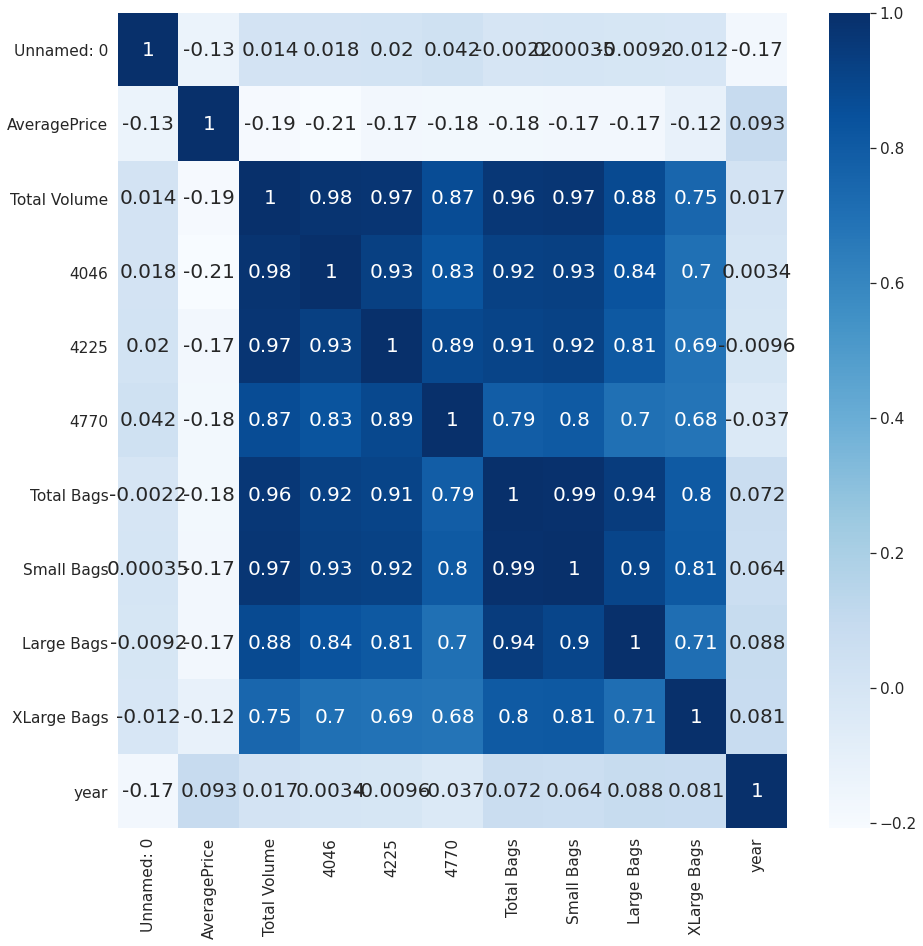

In [ ]:

X = data  #independent columns
y = data.columns   #target column i.e price range
sns.set(font_scale=1.4)#Consider calling sns.set(font_scale=1.4) before plotting your data. This will scale all fonts in your legend and on the axes.
#get correlations of each features in dataset
corrmat = X.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,15))
#plot heat map
fig=sns.heatmap(X[top_corr_features].corr(),annot=True,cmap="Blues",annot_kws={"size": 20}) #annot_kws调整字体
plt.savefig("heatmap.png")

###MIssing Values

In [ ]:
data.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

###Data Visualization

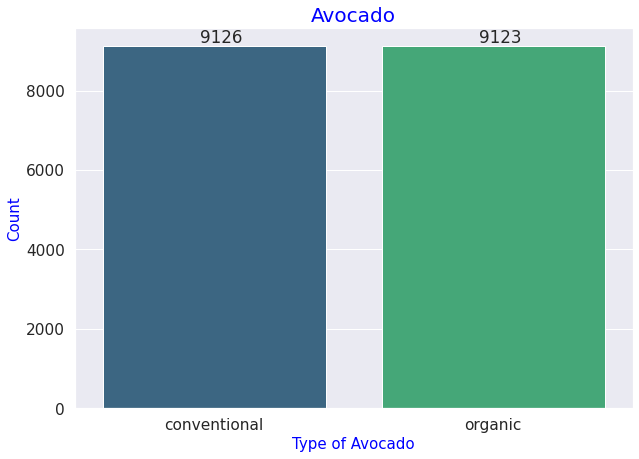

In [ ]:
f,ax = plt.subplots(figsize = (10,7))
ax = sns.countplot(x=data.type,label="Count",palette="viridis")
plt.xlabel('Type of Avocado',fontsize = 15,color='blue')
plt.ylabel('Count',fontsize = 15,color='blue')
plt.title('Avocado',fontsize = 20,color='blue')
#total = len(data['year'])
# how to show counts:
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.35, p.get_height()+75))

Text(0, 0.5, 'Average Price')

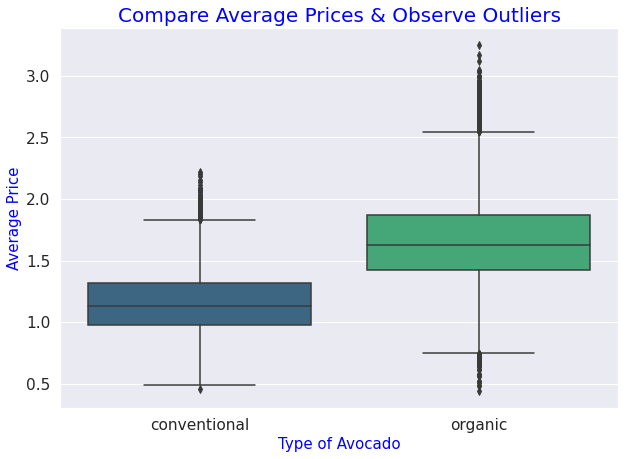

In [ ]:
f,ax = plt.subplots(figsize = (10,7))
sns.boxplot(x="type", y="AveragePrice",data=data,palette="viridis");
plt.title("Compare Average Prices & Observe Outliers",fontsize = 20,color='blue')
plt.xlabel('Type of Avocado',fontsize = 15,color='blue')
plt.ylabel('Average Price',fontsize = 15,color='blue')

Text(0, 0.5, 'Average Price')

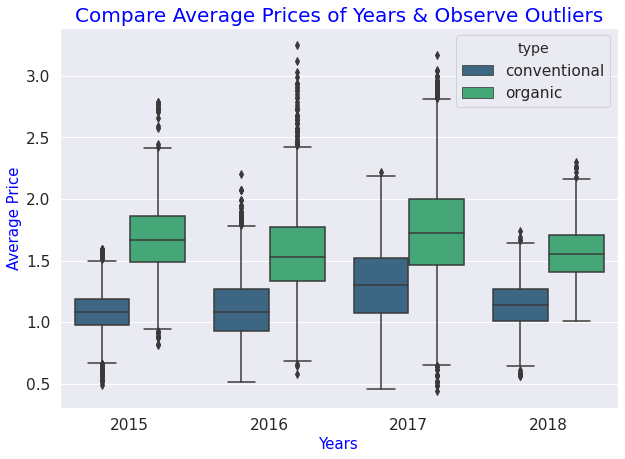

In [ ]:
f,ax = plt.subplots(figsize = (10,7))
sns.boxplot(x="year", y="AveragePrice",hue="type",data=data,palette="viridis");
plt.title("Compare Average Prices of Years & Observe Outliers",fontsize = 20,color='blue')
plt.xlabel('Years',fontsize = 15,color='blue')
plt.ylabel('Average Price',fontsize = 15,color='blue')

Text(0, 0.5, 'Average Price')

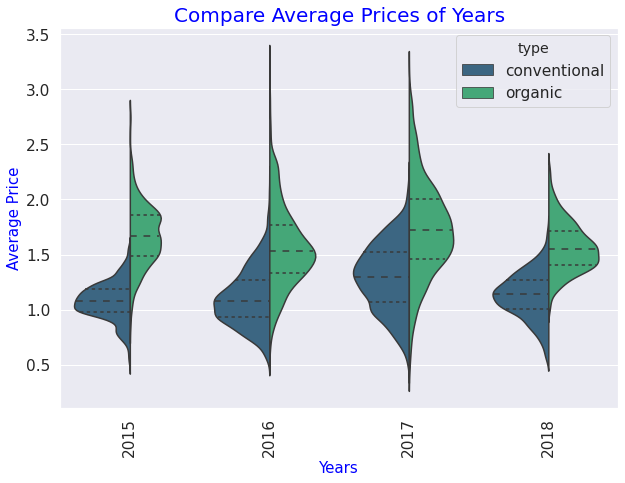

In [ ]:
f,ax = plt.subplots(figsize = (10,7))
sns.violinplot(x="year", y="AveragePrice", hue="type", data=data,split=True, inner="quart",palette="viridis")
plt.xticks(rotation=90)
plt.title("Compare Average Prices of Years",fontsize = 20,color='blue')
plt.xlabel('Years',fontsize = 15,color='blue')
plt.ylabel('Average Price',fontsize = 15,color='blue')

Text(42.25, 0.5, 'Average Price')

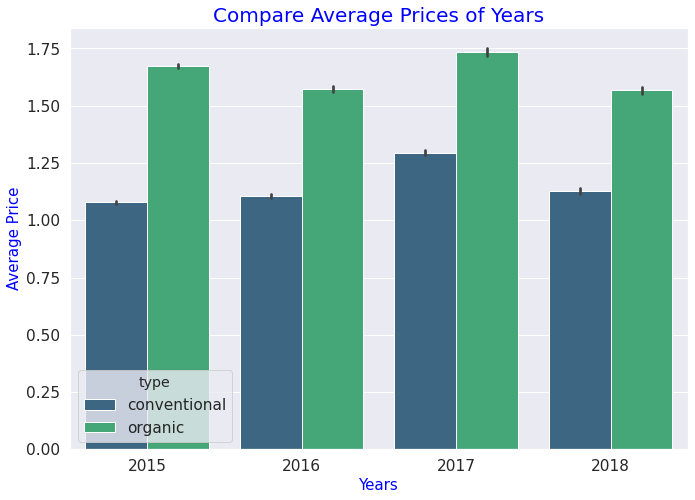

In [ ]:
f,ax = plt.subplots(figsize = (10,7))
sns.barplot(x="year", y="AveragePrice",hue="type",data=data,palette="viridis")
plt.tight_layout() # grafikler daha düzgün gözükecek
plt.title("Compare Average Prices of Years",fontsize = 20,color='blue')
plt.xlabel('Years',fontsize = 15,color='blue')
plt.ylabel('Average Price',fontsize = 15,color='blue')

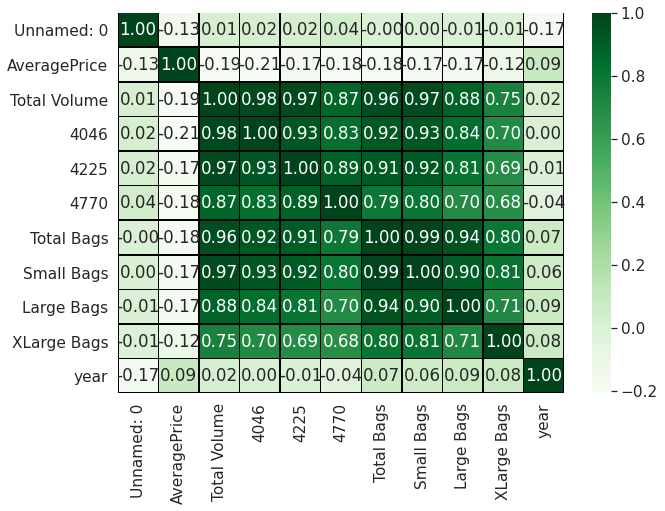

In [ ]:
f,ax = plt.subplots(figsize = (10,7))
#data.drop("Unnamed: 0",axis=1,inplace=True)
sns.heatmap(data.corr(), annot=True,cmap = 'Greens', linewidths=0.5,linecolor="black", fmt= '.2f',ax=ax)

###将Conventional和Organic分开

In [ ]:
# Split Dataset, "conventional & organic"
data_con = data[data["type"] == "conventional"]
data_org = data[data["type"] == "organic"]

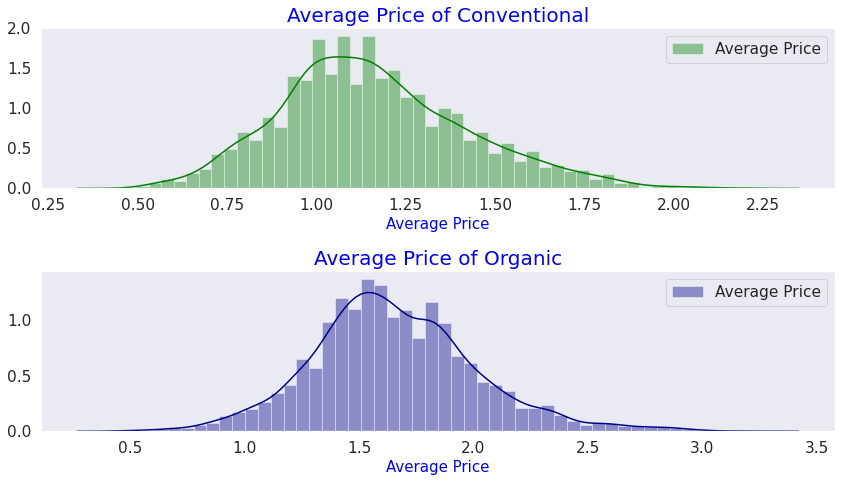

In [ ]:
f,ax = plt.subplots(figsize = (12,7))
plt.subplot(2,1,1) # ikiye birlik düzlemde ilk grafik
sns.distplot(data_con.AveragePrice,color="green",label="Average Price");
plt.title("Average Price of Conventional",fontsize = 20,color='blue')
plt.xlabel('Average Price',fontsize = 15,color='blue')
plt.legend()
plt.grid()
#
plt.subplot(2,1,2)
sns.distplot(data_org.AveragePrice,color="darkblue",label="Average Price");
plt.title("Average Price of Organic",fontsize = 20,color='blue')
plt.xlabel('Average Price',fontsize = 15,color='blue')
plt.tight_layout() # grafikler daha düzgün gözükecek
plt.legend()
plt.grid()

###Price of Regions

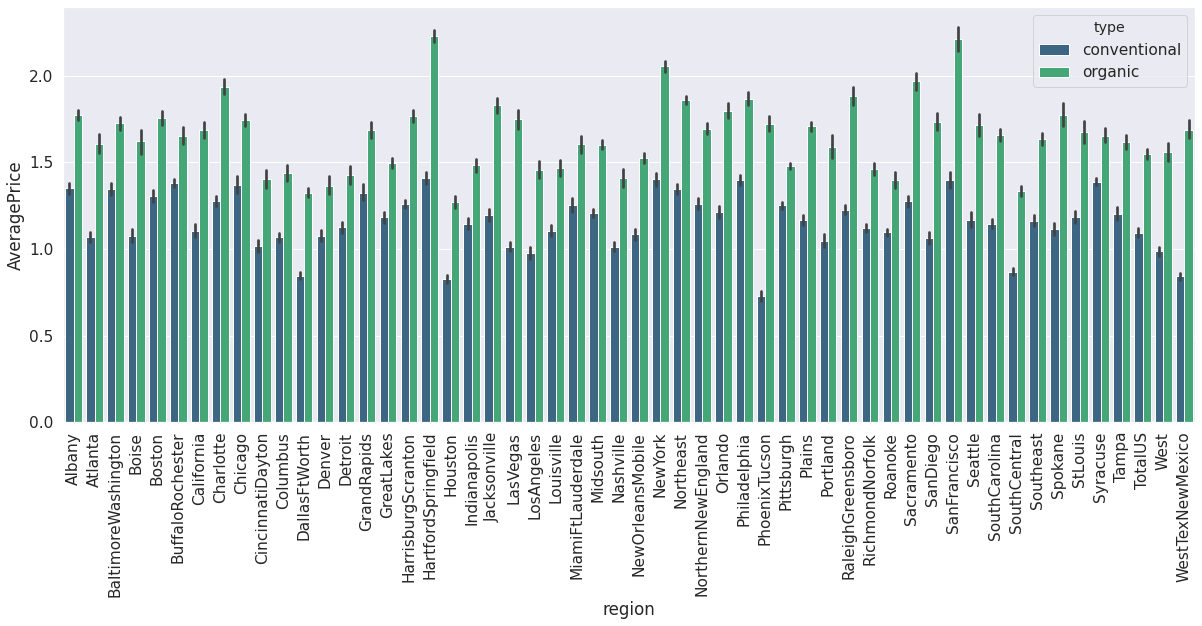

In [ ]:
# Avocado Average Price
f,ax = plt.subplots(figsize = (17,9))
sns.barplot(x="region", y="AveragePrice",hue="type",data=data,palette="viridis")
plt.xticks(rotation=90)
plt.tight_layout()

(-0.5, 511.5, 383.5, -0.5)

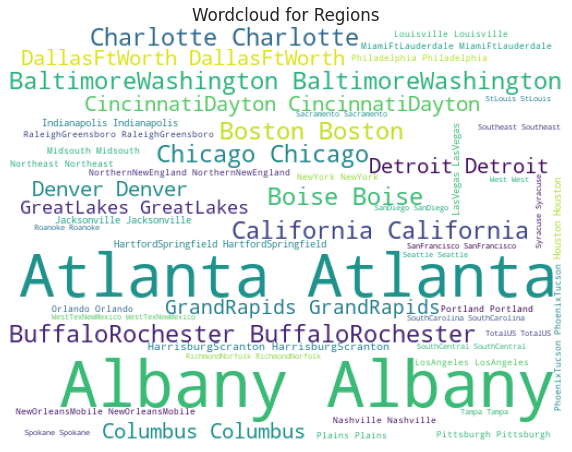

In [ ]:
#conda install -c conda-forge wordcloud
#from wordcloud import WordCloud 
# how many times using regions in dataset
from wordcloud import WordCloud 
data_region = data.region
plt.subplots(figsize=(10,10))
wordcloud = WordCloud(
                          background_color='white',
                          width=512,
                          height=384
                         ).generate("*".join(data_region))
plt.imshow(wordcloud)
plt.title("Wordcloud for Regions")
plt.axis('off')

###不同年份的consumption

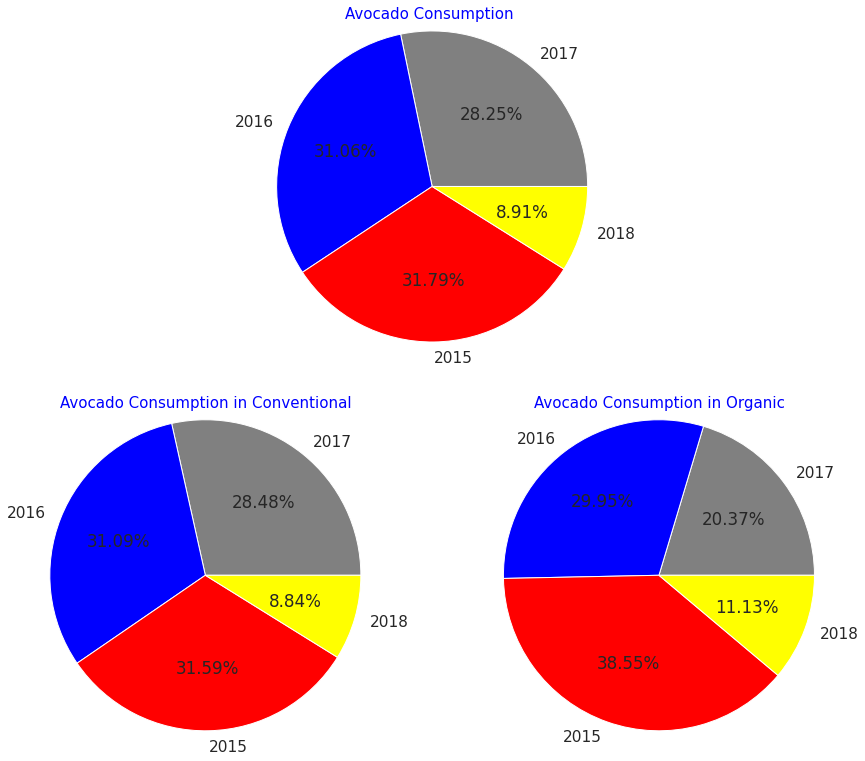

<Figure size 432x288 with 0 Axes>

In [ ]:
# Sum(ounce) of Avocados for per year
data_2015 = data[data.year==2015]
sum_2015 = data_2015["Total Volume"].sum()
data_2016 = data[data.year==2016]
sum_2016 = data_2016["Total Volume"].sum()
data_2017 = data[data.year==2017]
sum_2017 = data_2017["Total Volume"].sum()
data_2018 = data[data.year==2018]
sum_2018 = data_2018["Total Volume"].sum()
#**********************************************************************************
# Sum(ounce) of Avocados for per year in conventional
data_con_2015 = data_con[data.year==2015]
sum_con_2015 = data_con_2015["Total Volume"].sum()
data_con_2016 = data_con[data.year==2016]
sum_con_2016 = data_con_2016["Total Volume"].sum()
data_con_2017 = data_con[data.year==2017]
sum_con_2017 = data_con_2017["Total Volume"].sum()
data_con_2018 = data_con[data.year==2018]
sum_con_2018 = data_con_2018["Total Volume"].sum()
#**********************************************************************************
# Sum(ounce) of Avocados for per year in organic
data_org_2015 = data_org[data.year==2015]
sum_org_2015 = data_org_2015["Total Volume"].sum()
data_org_2016 = data_org[data.year==2016]
sum_org_2016 = data_org_2016["Total Volume"].sum()
data_org_2017 = data_org[data.year==2017]
sum_org_2017 = data_org_2017["Total Volume"].sum()
data_org_2018 = data_org[data.year==2018]
sum_org_2018 = data_org_2018["Total Volume"].sum()

labels = data.year.value_counts().index
colors = ['grey','blue','red','yellow']
fracs = [15, 30, 45, 10]
sizes_1 = [sum_con_2015,sum_con_2016,sum_con_2017,sum_con_2018]#for con
fig = plt.figure(figsize = (9,9))
#
sizes_2 = [sum_org_2015,sum_org_2016,sum_org_2017,sum_org_2018]#for org
ax1 = fig.add_axes([0, -0.1, .5, .5], aspect=1)
ax1.pie(sizes_1, labels=labels, radius = 1.2,colors=colors,autopct='%1.2f%%')
#
ax2 = fig.add_axes([0.7, -0.1, .5, .5], aspect=1)
ax2.pie(sizes_2, labels=labels, radius = 1.2,colors=colors,autopct='%1.2f%%')
#
sizes_0 = [sum_2015,sum_2016,sum_2017,sum_2018]
ax3 = fig.add_axes([.35, 0, .5, 1.5], aspect=1)
ax3.pie(sizes_0, labels=labels, radius = 1.2,colors=colors,autopct='%1.2f%%')
#
ax1.set_title('Avocado Consumption in Conventional',color = 'blue',fontsize = 15)
ax2.set_title('Avocado Consumption in Organic',color = 'blue',fontsize = 15)
ax3.set_title('Avocado Consumption ',color = 'blue',fontsize = 15)
plt.show()
plt.tight_layout() # grafikler daha düzgün gözükecek

#Classification

###日月年分开

In [ ]:
data.head()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,day
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


In [ ]:
# drop unnecessary features
data.drop(["Unnamed: 0","region"],axis=1,inplace=True)

In [ ]:
# find dummy variables
data["type"] = pd.get_dummies(data.type,drop_first=True)

In [ ]:
data.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,month,day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,11,29


In [ ]:
data["type"].describe()

count    18249.000000
mean         0.499918
std          0.500014
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: type, dtype: float64

#Regression Model

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

Saving avocado.csv to avocado (10).csv
User uploaded file "avocado.csv" with length 1989197 bytes


In [ ]:
data=pd.read_csv("avocado.csv")
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [ ]:
datanew=data

In [ ]:
datanew.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [ ]:
##写一份完整的清理过后的csv给studio
# split date: day,month,year 
liste = []
for date in datanew.Date:
    liste.append(date.split("-"))
    
# month and day adding to lists
month = []
day = []
for i in range(len(liste)):
    month.append(liste[i][1])
    day.append(liste[i][2])
    
# adding to dataset
datanew["month"] = month
datanew["day"] = day

# delete old date column
datanew.drop(["Date"],axis=1,inplace=True)

#convert objects to int
datanew.month = datanew.month.values.astype(int)
datanew.day = datanew.day.values.astype(int)

In [ ]:
# drop unnecessary features
datanew.drop(["Unnamed: 0"],axis=1,inplace=True)

In [ ]:
datanew.head()

In [ ]:

datanew= pd.DataFrame(datanew)

In [ ]:
datanew.to_csv('datanew.csv')

##将Con余Org分开

In [ ]:
# Split Dataset, "conventional & organic"
data_con = data[data["type"] == "conventional"]
data_org = data[data["type"] == "organic"]

##Price of Con

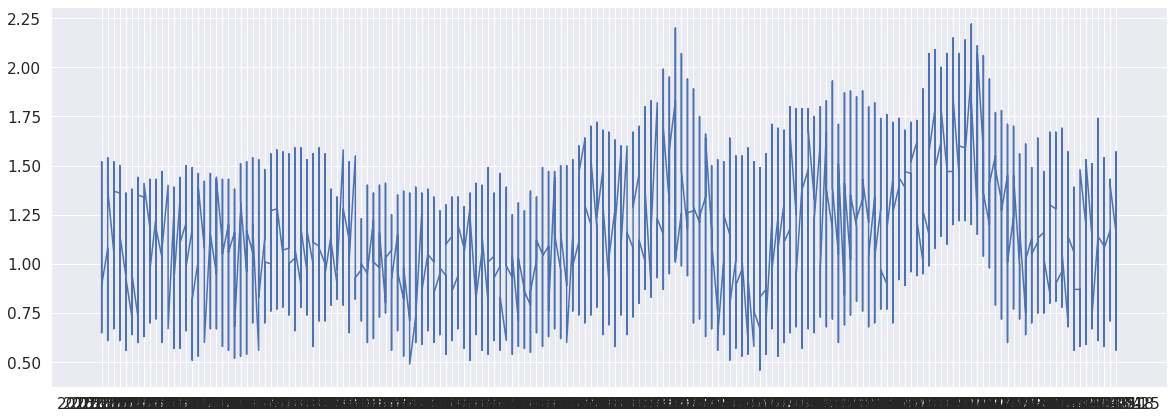

In [ ]:
f,ax = plt.subplots(figsize = (20,7))
data_con = data_con.sort_values("Date")
plt.plot(data_con['Date'], data_con['AveragePrice'])

##Price of Org

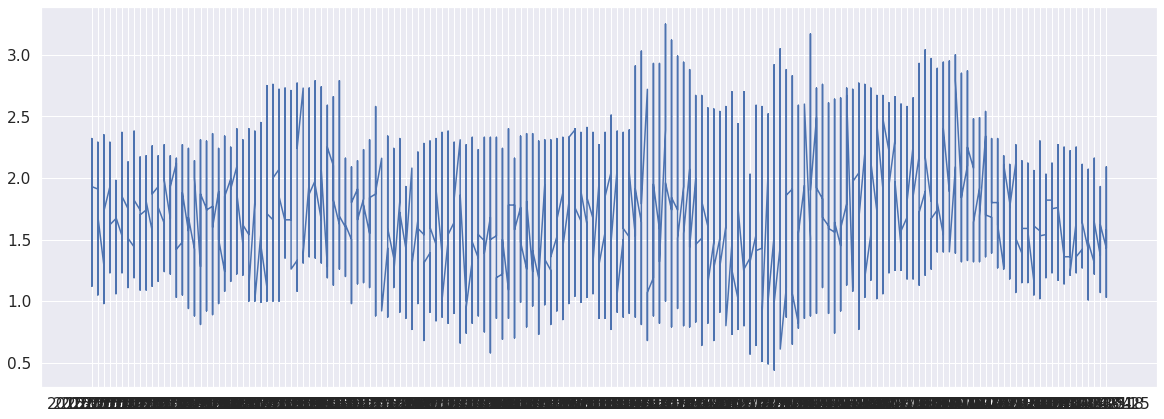

In [ ]:
f,ax = plt.subplots(figsize = (20,7))
data_org = data_org.sort_values("Date")
plt.plot(data_org['Date'], data_org['AveragePrice'])

#Regresesion Analysis

##Feature Engineering

In [ ]:
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [ ]:
data.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


## Split Dataset, "conventional & organic"

In [ ]:

data_con = data[data["type"] == "conventional"]
data_org = data[data["type"] == "organic"]

##find dummy variables


In [ ]:
data_con = pd.get_dummies(data_con,drop_first=True)
data_org = pd.get_dummies(data_org,drop_first=True)

In [ ]:
data_con.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,month,day,region_Atlanta,region_BaltimoreWashington,region_Boise,region_Boston,region_BuffaloRochester,region_California,region_Charlotte,region_Chicago,region_CincinnatiDayton,region_Columbus,region_DallasFtWorth,region_Denver,region_Detroit,region_GrandRapids,region_GreatLakes,region_HarrisburgScranton,region_HartfordSpringfield,region_Houston,region_Indianapolis,region_Jacksonville,region_LasVegas,region_LosAngeles,region_Louisville,region_MiamiFtLauderdale,region_Midsouth,region_Nashville,region_NewOrleansMobile,region_NewYork,region_Northeast,region_NorthernNewEngland,region_Orlando,region_Philadelphia,region_PhoenixTucson,region_Pittsburgh,region_Plains,region_Portland,region_RaleighGreensboro,region_RichmondNorfolk,region_Roanoke,region_Sacramento,region_SanDiego,region_SanFrancisco,region_Seattle,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,12,27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,12,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,12,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,12,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,11,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
data_org.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,month,day,region_Atlanta,region_BaltimoreWashington,region_Boise,region_Boston,region_BuffaloRochester,region_California,region_Charlotte,region_Chicago,region_CincinnatiDayton,region_Columbus,region_DallasFtWorth,region_Denver,region_Detroit,region_GrandRapids,region_GreatLakes,region_HarrisburgScranton,region_HartfordSpringfield,region_Houston,region_Indianapolis,region_Jacksonville,region_LasVegas,region_LosAngeles,region_Louisville,region_MiamiFtLauderdale,region_Midsouth,region_Nashville,region_NewOrleansMobile,region_NewYork,region_Northeast,region_NorthernNewEngland,region_Orlando,region_Philadelphia,region_PhoenixTucson,region_Pittsburgh,region_Plains,region_Portland,region_RaleighGreensboro,region_RichmondNorfolk,region_Roanoke,region_Sacramento,region_SanDiego,region_SanFrancisco,region_Seattle,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
9126,1.83,989.55,8.16,88.59,0.0,892.80,892.80,0.00,0.0,2015,12,27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9127,1.89,1163.03,30.24,172.14,0.0,960.65,960.65,0.00,0.0,2015,12,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9128,1.85,995.96,10.44,178.70,0.0,806.82,806.82,0.00,0.0,2015,12,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9129,1.84,1158.42,90.29,104.18,0.0,963.95,948.52,15.43,0.0,2015,12,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9130,1.94,831.69,0.00,94.73,0.0,736.96,736.96,0.00,0.0,2015,11,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
data_con.to_csv('data_con.csv')

In [ ]:
data_org.to_csv('data_org.csv')

In [ ]:
data_con.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'year', 'month', 'day',
       'region_Atlanta', 'region_BaltimoreWashington', 'region_Boise',
       'region_Boston', 'region_BuffaloRochester', 'region_California',
       'region_Charlotte', 'region_Chicago', 'region_CincinnatiDayton',
       'region_Columbus', 'region_DallasFtWorth', 'region_Denver',
       'region_Detroit', 'region_GrandRapids', 'region_GreatLakes',
       'region_HarrisburgScranton', 'region_HartfordSpringfield',
       'region_Houston', 'region_Indianapolis', 'region_Jacksonville',
       'region_LasVegas', 'region_LosAngeles', 'region_Louisville',
       'region_MiamiFtLauderdale', 'region_Midsouth', 'region_Nashville',
       'region_NewOrleansMobile', 'region_NewYork', 'region_Northeast',
       'region_NorthernNewEngland', 'region_Orlando', 'region_Philadelphia',
       'region_PhoenixTucson', 'region_Pittsburgh', 'region_Plains',
  

In [ ]:
#TRAIN里保留y

y = data_con[["AveragePrice"]][:]

# Scale the data to be between -1 and 1
sc_x = StandardScaler()
sc_y = StandardScaler()
x = sc_x.fit_transform(x)
y = sc_y.fit_transform(y)
# Creating Train and Test Datasets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [ ]:

y = data_con[["AveragePrice"]][:]
# X
x = data_con.drop(["AveragePrice"],axis=1,inplace=True)
x = data_con.iloc[:,1:]
# Scale the data to be between -1 and 1
sc_x = StandardScaler()
sc_y = StandardScaler()
x = sc_x.fit_transform(x)
y = sc_y.fit_transform(y)
# Creating Train and Test Datasets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [ ]:
#Convert train and test dataset from numpy array to panda dataframe
x_train= pd.DataFrame(data=x_train,columns=['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'year', 'month', 'day',
       'region_Atlanta', 'region_BaltimoreWashington', 'region_Boise',
       'region_Boston', 'region_BuffaloRochester', 'region_California',
       'region_Charlotte', 'region_Chicago', 'region_CincinnatiDayton',
       'region_Columbus', 'region_DallasFtWorth', 'region_Denver',
       'region_Detroit', 'region_GrandRapids', 'region_GreatLakes',
       'region_HarrisburgScranton', 'region_HartfordSpringfield',
       'region_Houston', 'region_Indianapolis', 'region_Jacksonville',
       'region_LasVegas', 'region_LosAngeles', 'region_Louisville',
       'region_MiamiFtLauderdale', 'region_Midsouth', 'region_Nashville',
       'region_NewOrleansMobile', 'region_NewYork', 'region_Northeast',
       'region_NorthernNewEngland', 'region_Orlando', 'region_Philadelphia',
       'region_PhoenixTucson', 'region_Pittsburgh', 'region_Plains',
       'region_Portland', 'region_RaleighGreensboro', 'region_RichmondNorfolk',
       'region_Roanoke', 'region_Sacramento', 'region_SanDiego',
       'region_SanFrancisco', 'region_Seattle', 'region_SouthCarolina',
       'region_SouthCentral', 'region_Southeast', 'region_Spokane',
       'region_StLouis', 'region_Syracuse', 'region_Tampa', 'region_TotalUS',
       'region_West', 'region_WestTexNewMexico'])
x_test= pd.DataFrame(data=x_test)
y_train= pd.DataFrame(data=y_train)
y_test= pd.DataFrame(data=y_test)


In [ ]:
#Save datasets, because i want to run randomforest in Rstudio
x_train.to_csv('x_train.csv')
x_test.to_csv('x_test.csv')
y_train.to_csv('y_train.csv')
y_test.to_csv('y_test.csv')



##Classic models

In [ ]:
classic_models = [] 
classic_models.append(('LR', LinearRegression())) 
classic_models.append(('LASSO', Lasso())) 
classic_models.append(('EN', ElasticNet())) 
classic_models.append(('KNN', KNeighborsRegressor())) 
classic_models.append(('DTR', DecisionTreeRegressor())) 
classic_models.append(('SVR', SVR()))

In [ ]:
print(classic_models)

[('LR', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)), ('LASSO', Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)), ('EN', ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)), ('KNN', KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')), ('DTR', DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_spli

In [ ]:
# evaluate models using cross validation score:
classic_results = [] 
classic_names = []
for name, model in classic_models:
    kfold = KFold(n_splits=10, random_state=42) 
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='r2') 
    classic_results.append(cv_results) 
    classic_names.append(name) 
    print("Model Name:{} Model Score:{:.3f} Model Std:{:.3f}".format(name, cv_results.mean(), cv_results.std()))

Model Name:LR Model Score:0.529 Model Std:0.033
Model Name:LASSO Model Score:-0.001 Model Std:0.001
Model Name:EN Model Score:-0.001 Model Std:0.001
Model Name:KNN Model Score:0.683 Model Std:0.031
Model Name:DTR Model Score:0.694 Model Std:0.020
Model Name:SVR Model Score:0.624 Model Std:0.031


Text(0, 0.5, 'Scores')

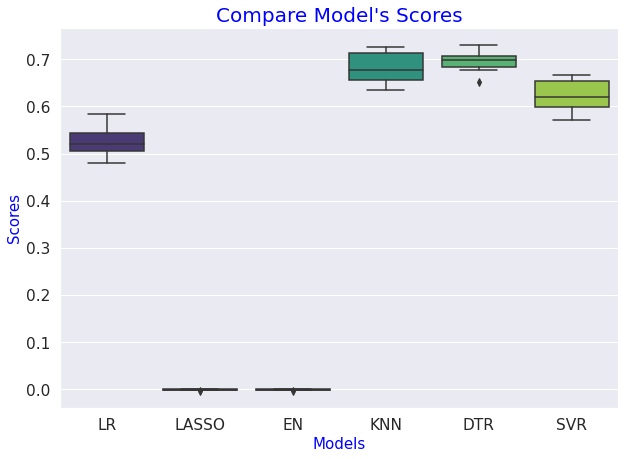

In [ ]:
# Compare Model's Scores
f,ax = plt.subplots(figsize = (10,7))
sns.boxplot(x=classic_names, y=classic_results,palette="viridis");
plt.title("Compare Model's Scores",fontsize = 20,color='blue')
plt.xlabel('Models',fontsize = 15,color='blue')
plt.ylabel('Scores',fontsize = 15,color='blue')

##Tuning Decision Tree Classifier

In [ ]:
# Tuning Decision Tree Model
criterions = ["gini","entropy"]
param_grid = dict(criterion=criterions) 

In [ ]:
dtr = DecisionTreeRegressor()
gs = GridSearchCV(estimator=dtr,param_grid=param_grid,scoring="r2", cv=kfold)
grid_search = gs.fit(x_train,y_train)
best_score = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Score:",best_score)
print("Best Parameters:",best_parameters)

KeyError: ignored